In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [69]:
resf=['no_pert.csv','lo_pert.csv','hi_pert.csv']
for resfile in resf:
    dff=pd.read_csv(resfile)
    hzmin=0.75*(dff.emestar/2e33)**2
    hzmax=1.77*(dff.emestar/2e33)**2
    dff=dff[(dff['a(i)']>hzmin)&(dff['a(i)']<hzmax)]
    dff['mass']=dff['emepla(i)/emet']+dff['emegas(i)']
    nlist=['ident', 'com', 'nplanets', 'massbudget', 'massefficiency', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',  'qest','scfac','ngi','mtr','apert']
    
    rdata=np.zeros((len(np.unique(dff.ident)),len(nlist)))
    kk=0
    fpert=dff.fpert.iloc[0]
    for i in np.unique(dff.ident):    
        filter=dff.ident==i
        dummy=dff[filter]
        pmass=dummy.mass
        com=((pmass*dummy['a(i)']).sum())/pmass.sum()
        npl=len(dummy)
        mtot=pmass.sum()
        sigmag0=dummy.sigmag_0.iloc[0]
        effm=mtot*3e-6/(dummy.emed.iloc[0])
        rc=dummy.rc.iloc[0]
        ms=dummy.emestar.iloc[0]/2e33
        md=dummy.emed.iloc[0]*ms
        metal=dummy.emetal.iloc[0]
        taugas=dummy.taugas.iloc[0]   
        qest=dummy.qest.iloc[0]
        scfac=fpert/np.sqrt(ms)
        boogi=dummy.mass>10 # 10 earth masses as giant mass limit
        ngi=(boogi).sum()
        apert=dummy.apert.iloc[0]
        mtr=(dummy.mass[np.logical_not(boogi)]).sum()
        rdata[kk,:]=i,com,npl,mtot,effm,sigmag0,md,rc,ms,metal,taugas,qest,scfac,ngi,mtr,apert
        kk=kk+1
    pd.DataFrame(rdata,columns=nlist).to_csv('hz_%s.csv'%resfile[:-4])

In [71]:
dfhn=pd.read_csv('hz_no_pert.csv',index_col=None)
dfhn["gia"]=dfhn.ngi>0
dfhl=pd.read_csv('hz_lo_pert.csv',index_col=None)
dfhl["gia"]=dfhl.ngi>0
dfhh=pd.read_csv('hz_hi_pert.csv',index_col=None)
dfhh["gia"]=dfhh.ngi>0

In [72]:
dfpno=pd.read_csv('proc_no_pert.csv',index_col=None)
dfpno["gia"]=dfpno.ngi>0
dfplo=pd.read_csv('proc_lo_pert.csv',index_col=None)
dfplo["gia"]=dfplo.ngi>0
dfphi=pd.read_csv('proc_hi_pert.csv',index_col=None)
dfphi["gia"]=dfphi.ngi>0

In [73]:
dfhn.head()

,Unnamed: 0,ident,com,nplanets,massbudget,massefficiency,sigmag0,md,rc,ms,metal,taugas,qest,scfac,ngi,mtr,apert,gia
0,0,6.0,0.752114,1.0,8.385053,0.000210,75.740878,0.103391,47.343380,0.861595,0.021273,1790533.125,4.412694,1.077329,0.0,8.385053,0.0,False
1,1,16.0,1.944809,9.0,2.078874,0.000037,118.543720,0.213987,45.042137,1.258747,-0.352459,1107031.750,4.469478,0.891314,0.0,2.078874,0.0,False
2,2,17.0,0.520304,1.0,2.825963,0.000137,35.587738,0.045863,49.645451,0.739731,0.121866,9050091.000,7.257983,1.162688,0.0,2.825963,0.0,False
3,3,22.0,1.502230,11.0,1.033778,0.000084,33.506526,0.039169,39.524826,1.058611,0.136733,1188361.500,16.342405,0.971923,0.0,1.033778,0.0,False
4,4,24.0,0.726110,1.0,3.510325,0.000096,109.075208,0.082925,37.771751,0.753862,-0.099928,1472218.250,3.918911,1.151739,0.0,3.510325,0.0,False


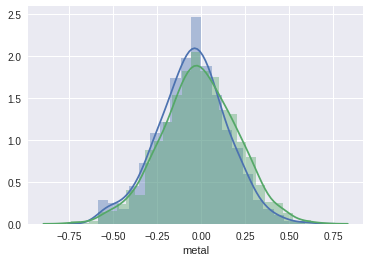

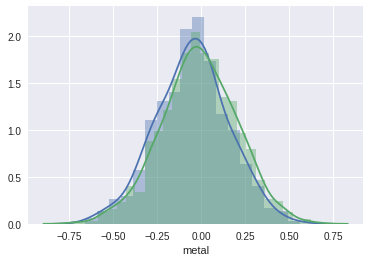

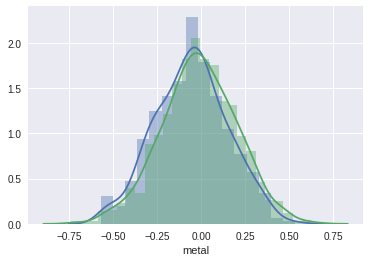

In [208]:
sns.distplot(dfhn.metal)
sns.distplot(dfpno.metal)
plt.show()
sns.distplot(dfhl.metal)
sns.distplot(dfplo.metal)
plt.show()
sns.distplot(dfhh.metal)
sns.distplot(dfphi.metal)

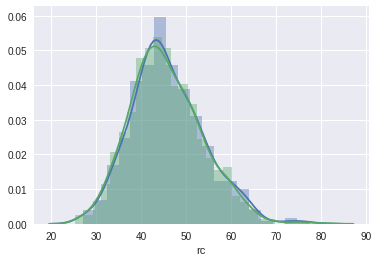

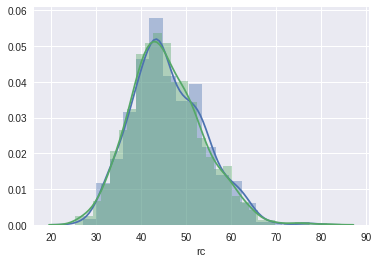

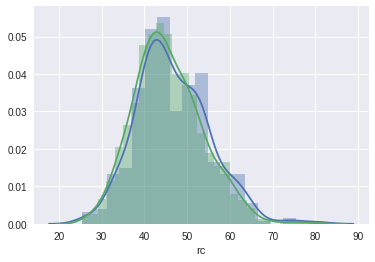

In [209]:
sns.distplot(dfhn.rc)
sns.distplot(dfpno.rc)
plt.show()
sns.distplot(dfhl.rc)
sns.distplot(dfplo.rc)
plt.show()
sns.distplot(dfhh.rc)
sns.distplot(dfphi.rc)
plt.show()

- Lower disk masses favor HZ planet formation (prob. related to migration)

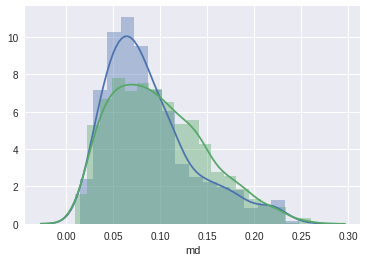

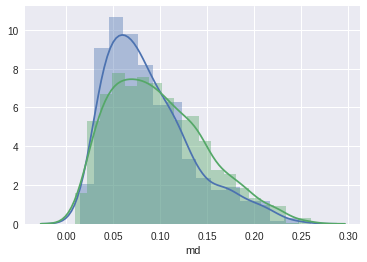

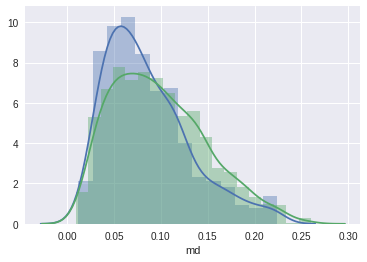

In [192]:
sns.distplot(dfhn.md) # same thing happens w sigmag_0, which is a function of md and ac, but there is no corr to ac
sns.distplot(dfpno.md)
plt.show()
sns.distplot(dfhl.md)
sns.distplot(dfplo.md)
plt.show()
sns.distplot(dfhh.md)
sns.distplot(dfphi.md)
plt.show()

- Lower taugas systems favor HZ planet formation

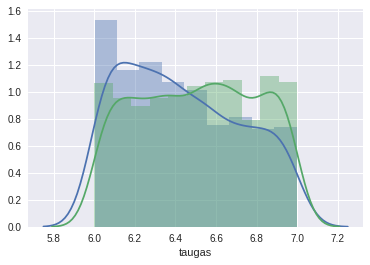

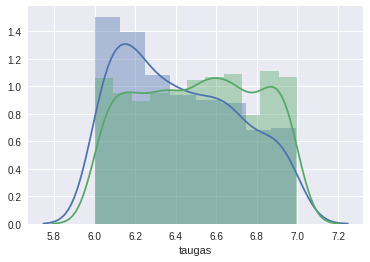

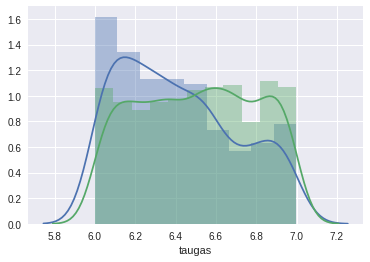

In [197]:
sns.distplot(np.log10(dfhn.taugas))
sns.distplot(np.log10(dfpno.taugas))
plt.show()
sns.distplot(np.log10(dfhl.taugas))
sns.distplot(np.log10(dfplo.taugas))
plt.show()
sns.distplot(np.log10(dfhh.taugas))
sns.distplot(np.log10(dfphi.taugas))
plt.show()

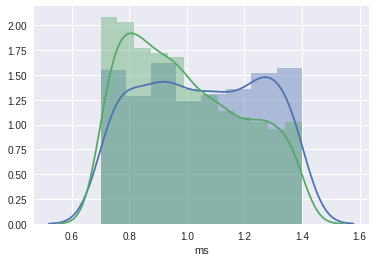

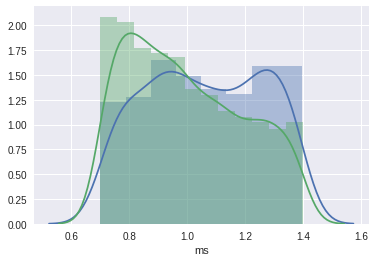

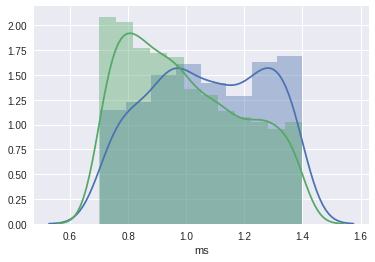

In [206]:
sns.distplot(dfhn.ms) # same thing happens w sigmag_0, which is a function of md and ac, but there is no corr to ac
sns.distplot(dfpno.ms)
plt.show()
sns.distplot(dfhl.ms)
sns.distplot(dfplo.ms)
plt.show()
sns.distplot(dfhh.ms)
sns.distplot(dfphi.ms)
plt.show()

## Systems with only terrestrial planets

In [215]:
print("Total systems:",len(dfhn),len(dfhl),len(dfhh))
print("Systems with only terrestrial planets:",(~dfhn.gia).sum(),(~dfhl.gia).sum(),(~dfhh.gia).sum())

Total systems: 489 440 430
Systems with only terrestrial planets: 434 375 359


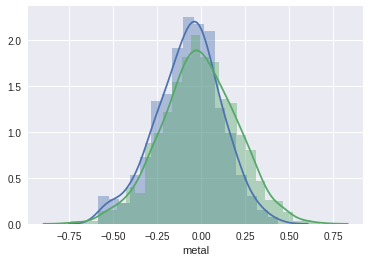

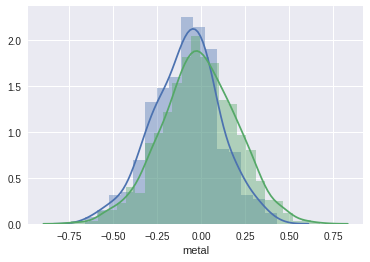

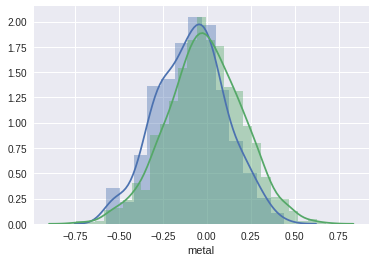

In [199]:
sns.distplot(dfhn.metal[~dfhn.gia])
sns.distplot(dfpno.metal)
plt.show()
sns.distplot(dfhl.metal[~dfhl.gia])
sns.distplot(dfplo.metal)
plt.show()
sns.distplot(dfhh.metal[~dfhh.gia])
sns.distplot(dfphi.metal)
plt.show()

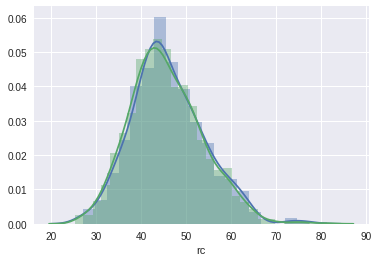

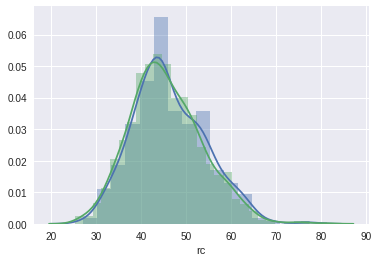

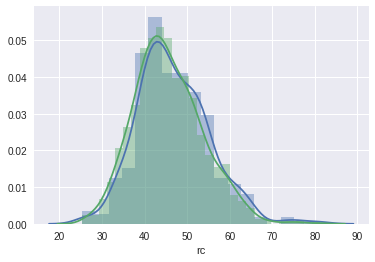

In [211]:
sns.distplot(dfhn.rc[~dfhn.gia])
sns.distplot(dfpno.rc)
plt.show()
sns.distplot(dfhl.rc[~dfhl.gia])
sns.distplot(dfplo.rc)
plt.show()
sns.distplot(dfhh.rc[~dfhh.gia])
sns.distplot(dfphi.rc)
plt.show()

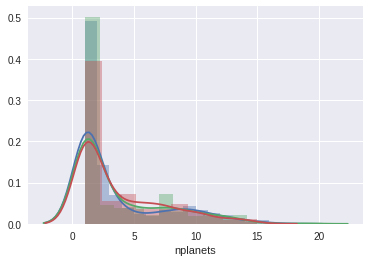

In [223]:
sns.distplot(dfhn.nplanets[~dfhn.gia])
sns.distplot(dfhl.nplanets[~dfhl.gia])
sns.distplot(dfhh.nplanets[~dfhh.gia])

4.64838676127
3.85123090193
4.5126810252


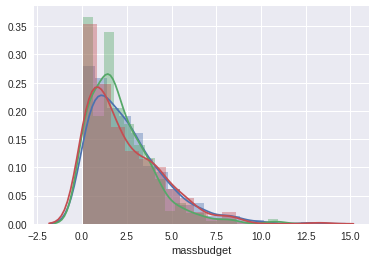

In [230]:
sns.distplot(dfhn.massbudget[~dfhn.gia])
print(np.percentile(dfhn.massbudget[~dfhn.gia],86))
sns.distplot(dfhl.massbudget[~dfhl.gia])
print(np.percentile(dfhl.massbudget[~dfhl.gia],86))
sns.distplot(dfhh.massbudget[~dfhh.gia])
print(np.percentile(dfhh.massbudget[~dfhh.gia],86))

3.86534958697
3.20439501178
3.81294581728


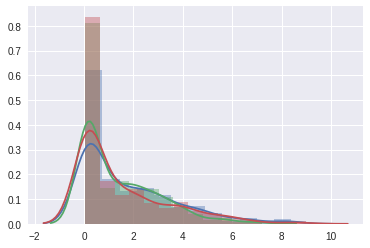

In [229]:
sns.distplot(dfhn.massbudget[~dfhn.gia]/dfhn.nplanets[~dfhn.gia])
print(np.percentile(dfhn.massbudget[~dfhn.gia]/dfhn.nplanets[~dfhn.gia],86))
sns.distplot(dfhl.massbudget[~dfhl.gia]/dfhl.nplanets[~dfhl.gia])
print(np.percentile(dfhl.massbudget[~dfhl.gia]/dfhl.nplanets[~dfhl.gia],86))
sns.distplot(dfhh.massbudget[~dfhh.gia]/dfhh.nplanets[~dfhh.gia])
print(np.percentile(dfhh.massbudget[~dfhh.gia]/dfhh.nplanets[~dfhh.gia],86))

## Systems w/ giant planets

In [216]:
print("Total systems:",len(dfhn),len(dfhl),len(dfhh))
print("Systems with giant planets:",(dfhn.gia).sum(),(dfhl.gia).sum(),(dfhh.gia).sum())

Total systems: 489 440 430
Systems with giant planets: 55 65 71


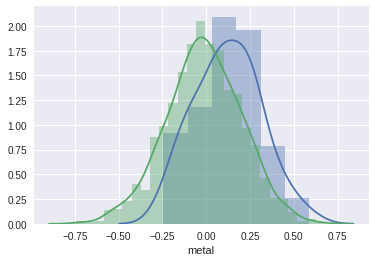

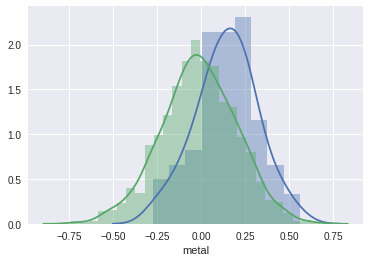

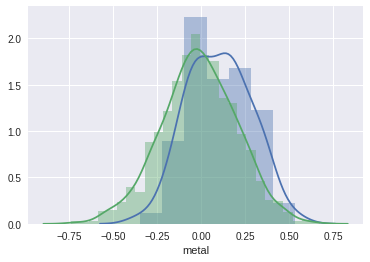

In [218]:
sns.distplot(dfhn.metal[dfhn.gia])
sns.distplot(dfpno.metal)
plt.show()
sns.distplot(dfhl.metal[dfhl.gia])
sns.distplot(dfplo.metal)
plt.show()
sns.distplot(dfhh.metal[dfhh.gia])
sns.distplot(dfphi.metal)
plt.show()

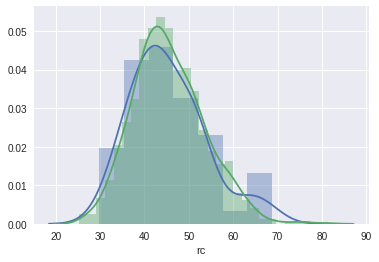

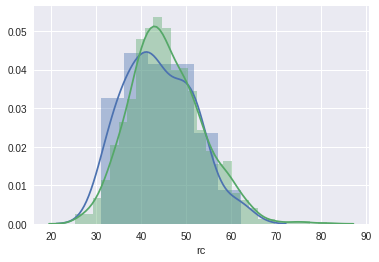

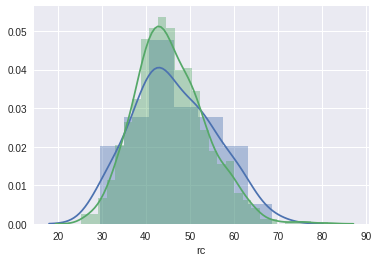

In [219]:
sns.distplot(dfhn.rc[dfhn.gia])
sns.distplot(dfpno.rc)
plt.show()
sns.distplot(dfhl.rc[dfhl.gia])
sns.distplot(dfplo.rc)
plt.show()
sns.distplot(dfhh.rc[dfhh.gia])
sns.distplot(dfphi.rc)
plt.show()

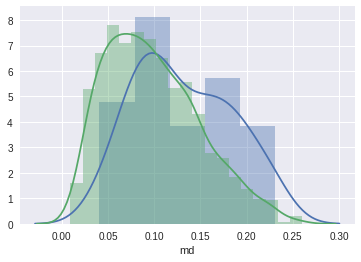

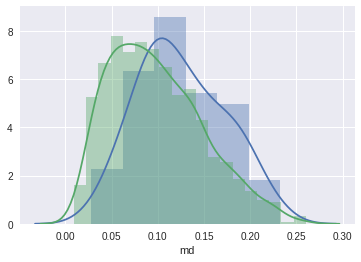

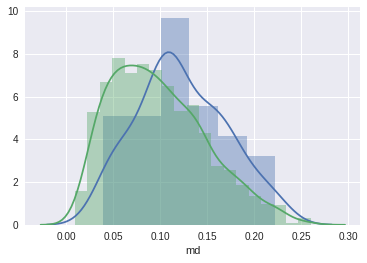

In [220]:
sns.distplot(dfhn.md[dfhn.gia])
sns.distplot(dfpno.md)
plt.show()
sns.distplot(dfhl.md[dfhl.gia])
sns.distplot(dfplo.md)
plt.show()
sns.distplot(dfhh.md[dfhh.gia])
sns.distplot(dfphi.md)
plt.show()

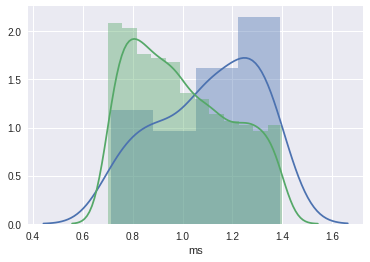

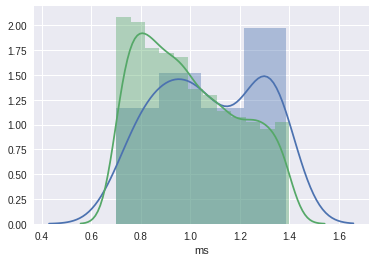

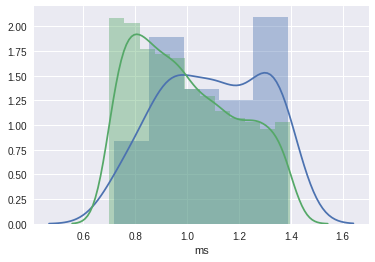

In [221]:
sns.distplot(dfhn.ms[dfhn.gia])
sns.distplot(dfpno.ms)
plt.show()
sns.distplot(dfhl.ms[dfhl.gia])
sns.distplot(dfplo.ms)
plt.show()
sns.distplot(dfhh.ms[dfhh.gia])
sns.distplot(dfphi.ms)
plt.show()

16964.0850114
19994.4523718
18992.5957969


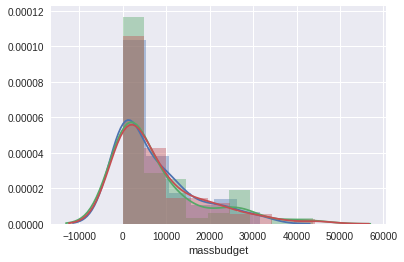

In [231]:
sns.distplot(dfhn.massbudget[dfhn.gia])
print(np.percentile(dfhn.massbudget[dfhn.gia],86))
sns.distplot(dfhl.massbudget[dfhl.gia])
print(np.percentile(dfhl.massbudget[dfhl.gia],86))
sns.distplot(dfhh.massbudget[dfhh.gia])
print(np.percentile(dfhh.massbudget[dfhh.gia],86))

In [234]:
dhng=dfhn[dfhn.gia]

In [238]:
(dhng.massbudget<30*317.8).sum(),len(dhng)

(37, 55)

In [240]:
dhng=dhng[dhng.massbudget<30*317.8]

(array([ 20.,   6.,   2.,   1.,   1.,   0.,   0.,   3.,   2.,   2.]),
 array([   11.74636376,   905.14392934,  1798.54149492,  2691.9390605 ,
         3585.33662608,  4478.73419166,  5372.13175725,  6265.52932283,
         7158.92688841,  8052.32445399,  8945.72201957]),
 <a list of 10 Patch objects>)

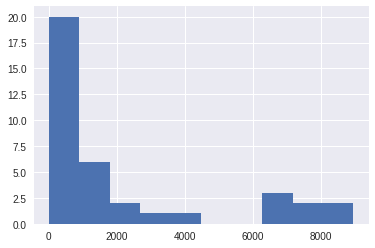

In [248]:
plt.hist(dhng.massbudget)

(array([ 217.,   51.,   44.,   20.,   37.,   18.,   22.,    6.,    9.,    6.]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 10 Patch objects>)

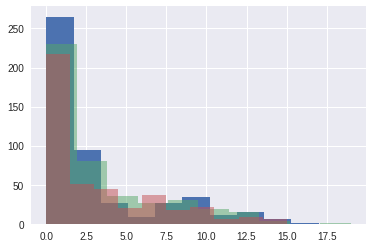

In [104]:
plt.hist(dfhn.nplanets-dfhn.ngi)
plt.hist(dfhl.nplanets-dfhl.ngi,alpha=0.5)
plt.hist(dfhh.nplanets-dfhh.ngi,alpha=0.5)

(array([ 0.33643411,  0.07906977,  0.06821705,  0.03100775,  0.05736434,
         0.02790698,  0.03410853,  0.00930233,  0.01395349,  0.00930233]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 10 Patch objects>)

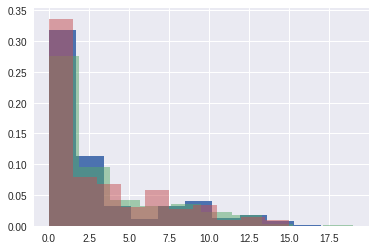

In [105]:
plt.hist(dfhn.nplanets-dfhn.ngi,normed=True)
plt.hist(dfhl.nplanets-dfhl.ngi,normed=True,alpha=0.5)
plt.hist(dfhh.nplanets-dfhh.ngi,normed=True,alpha=0.5)

(array([ 0.44352159,  0.04817276,  0.05980066,  0.02990033,  0.03156146,
         0.04152824,  0.02491694,  0.0166113 ,  0.00830565,  0.00996678]),
 array([  1. ,   2.4,   3.8,   5.2,   6.6,   8. ,   9.4,  10.8,  12.2,
         13.6,  15. ]),
 <a list of 10 Patch objects>)

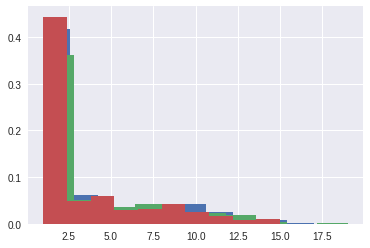

In [87]:
plt.hist(dfhn.nplanets,normed=True)
plt.hist(dfhl.nplanets,normed=True)
plt.hist(dfhh.nplanets,normed=True)

(array([ 0.32122905,  0.21787709,  0.1396648 ,  0.12569832,  0.08379888,
         0.05865922,  0.02513966,  0.01117318,  0.01675978,  0.        ,
         0.        ,  0.        ]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Patch objects>)

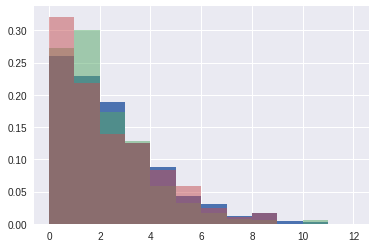

In [116]:
norm=True
plt.hist(dfhn.massbudget[~dfhn.gia],bins=range(13),normed=norm)
plt.hist(dfhl.massbudget[~dfhl.gia],bins=range(13),alpha=0.5,normed=norm)
plt.hist(dfhh.massbudget[~dfhh.gia],bins=range(13),alpha=0.5,normed=norm)

(array([ 201.,   52.,   35.,   31.,   17.,   13.,    6.,    1.,    3.,
           0.,    0.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Patch objects>)

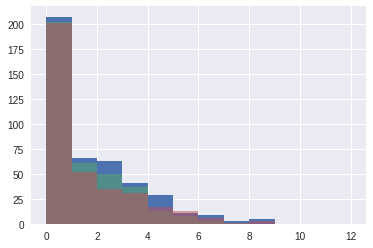

In [119]:
norm=False
plt.hist(dfhn.massbudget[~dfhn.gia]/dfhn.nplanets[~dfhn.gia],bins=range(13),normed=norm)
plt.hist(dfhl.massbudget[~dfhl.gia]/dfhl.nplanets[~dfhl.gia],bins=range(13),alpha=0.5,normed=norm)
plt.hist(dfhh.massbudget[~dfhh.gia]/dfhh.nplanets[~dfhh.gia],bins=range(13),alpha=0.5,normed=norm)

(array([ 115.,   78.,   50.,   45.,   30.,   21.,    9.,    4.,    6.,
           0.,    0.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Patch objects>)

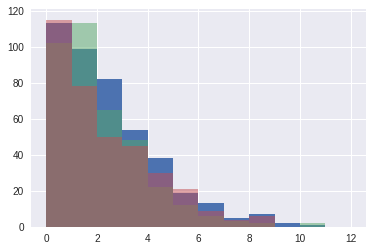

In [117]:
norm=False
plt.hist(dfhn.massbudget[~dfhn.gia],bins=range(13),normed=norm)
plt.hist(dfhl.massbudget[~dfhl.gia],bins=range(13),alpha=0.5,normed=norm)
plt.hist(dfhh.massbudget[~dfhh.gia],bins=range(13),alpha=0.5,normed=norm)

In [114]:
dfhn.nplanets.sum(),dfhl.nplanets.sum(),dfhh.nplanets.sum()

(1596.0, 1460.0, 1434.0)

In [132]:
np.in1d(dfpno.ident,dfhh.ident).sum(),len(dfhh) ## all h-HZ planet forming systems are in no_pert list

(430, 430)

In [133]:
np.in1d(dfpno.ident,dfhl.ident).sum(),len(dfhl) ## all l-HZ planet forming systems are in no_pert list

(440, 440)

In [149]:
filnh=np.in1d(dfhn.ident,dfhh.ident)
filnh.sum()

288

In [158]:
nnih=dfhn[~filnh]

In [150]:
filhn=np.in1d(dfhh.ident,dfhn.ident)
filhn.sum()

288

In [159]:
hnin=dfhh[~filhn]

(array([ 1.65716684,  2.17503148,  1.76073977,  1.86431269,  1.76073977,
         1.45002098,  1.1393022 ,  0.93215635,  0.82858342,  1.1393022 ]),
 array([ 0.70411122,  0.77210441,  0.84009759,  0.90809078,  0.97608397,
         1.04407716,  1.11207035,  1.18006353,  1.24805672,  1.31604991,
         1.3840431 ]),
 <a list of 10 Patch objects>)

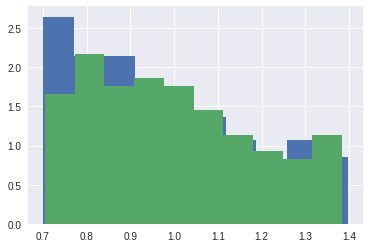

In [164]:
plt.hist(nnih.ms,normed=True)
plt.hist(hnin.ms,normed=True)

(array([ 0.28873239,  0.51408451,  0.1056338 ,  0.07042254,  0.00704225,
         0.00704225,  0.        ,  0.00704225,  0.        ]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

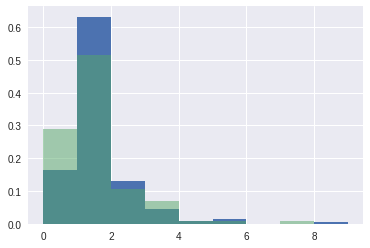

In [178]:
plt.hist(nnih.nplanets-nnih.ngi,normed=True,bins=range(10))
plt.hist(hnin.nplanets-hnin.ngi,normed=True,bins=range(10),alpha=0.5)

(array([ 0.50047982,  0.73754921,  0.89559547,  0.47413878,  0.21072835,
         0.31609252,  0.31609252,  0.15804626,  0.02634104,  0.10536417]),
 array([ 0.43276211,  0.70011118,  0.96746025,  1.23480933,  1.5021584 ,
         1.76950747,  2.03685655,  2.30420562,  2.5715547 ,  2.83890377,
         3.10625284]),
 <a list of 10 Patch objects>)

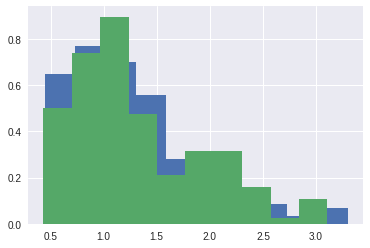

In [177]:
plt.hist(nnih.com,normed=True)
plt.hist(hnin.com,normed=True)

In [139]:
fill=np.in1d(dfhn.ident,dfhl.ident)
fill.sum()

271

In [146]:
lnotinn=dfhn.ident[~fill]

In [129]:
np.in1d(dfhh.ident,dfhl.ident).sum()

255

In [126]:
len(dfhn)

489

440

430

In [26]:
len(dff)

16194

In [16]:
hzmin=0.75*(dff.emestar/2e33)**2
hzmax=1.77*(dff.emestar/2e33)**2

In [24]:
dfhz=dff[(dff['a(i)']>hzmin)&(dff['a(i)']<hzmax)]

In [27]:
len(dfhz)

1596

(array([ 3.47682331,  3.42291907,  3.6115839 ,  3.66548814,  3.69244026,
         3.36901484,  2.91082882,  2.96473305,  3.09949365,  3.07254153]),
 array([-0.15463047, -0.12458769, -0.09454491, -0.06450213, -0.03445935,
        -0.00441657,  0.02562621,  0.055669  ,  0.08571178,  0.11575456,
         0.14579734]),
 <a list of 10 Patch objects>)

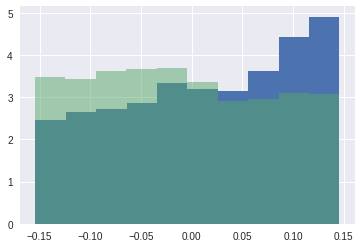

In [38]:
plt.hist(np.log10(np.unique(dfhz.emestar/2e33)),normed=True)
plt.hist(np.log10(np.unique(dff.emestar/2e33)),normed=True,alpha=0.5)

(array([ 1.99387151,  2.01705606,  1.75043371,  1.71565688,  1.40266542,
         1.27515039,  1.10126624,  1.00852803,  1.11285852,  0.93897437]),
 array([ 0.70043772,  0.77028739,  0.84013705,  0.90998672,  0.97983638,
         1.04968604,  1.11953571,  1.18938537,  1.25923504,  1.3290847 ,
         1.39893436]),
 <a list of 10 Patch objects>)

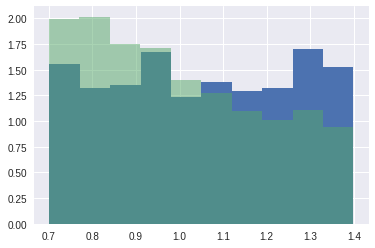

In [39]:
plt.hist(np.unique(dfhz.emestar/2e33),normed=True)
plt.hist(np.unique(dff.emestar/2e33),normed=True,alpha=0.5)

(array([ 0.02280588,  0.15964116,  0.34778966,  0.98065282,  1.72754538,
         1.81306743,  1.2315175 ,  0.58154993,  0.14823822,  0.02850735]),
 array([-0.74246138, -0.60044246, -0.45842354, -0.31640462, -0.1743857 ,
        -0.03236678,  0.10965214,  0.25167106,  0.39368998,  0.5357089 ,
         0.67772782]),
 <a list of 10 Patch objects>)

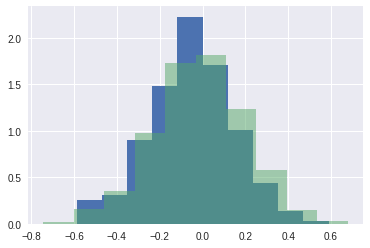

In [42]:
plt.hist(np.unique(dfhz.emetal),normed=True)
plt.hist(np.unique(dff.emetal),normed=True,alpha=0.5)

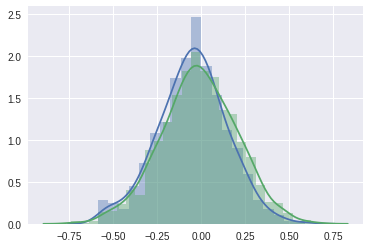

In [44]:
sns.distplot(np.unique(dfhz.emetal))
sns.distplot(np.unique(dff.emetal))

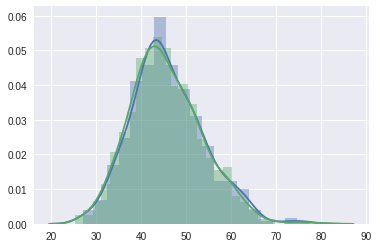

In [45]:
sns.distplot(np.unique(dfhz.rc))
sns.distplot(np.unique(dff.rc))

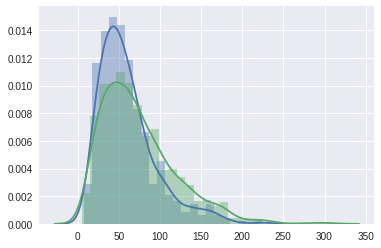

In [46]:
sns.distplot(np.unique(dfhz.sigmag_0))
sns.distplot(np.unique(dff.sigmag_0))

In [63]:
dfhz['mass']=dfhz['emepla(i)/emet']+dfhz['emegas(i)']

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(array([ 1222.,    91.,    78.,    59.,    33.,    25.,    12.,    11.,
            2.,     8.]),
 array([ 0.05002826,  0.88353074,  1.71703322,  2.5505357 ,  3.38403817,
         4.21754065,  5.05104313,  5.88454561,  6.71804809,  7.55155057,
         8.38505305]),
 <a list of 10 Patch objects>)

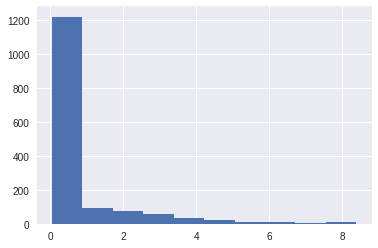

In [67]:
plt.hist(dfhz.mass[dfhz.mass<10])

In [68]:
dfhz.mass.min()

0.050028258507232269